In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import io
import glob

[JHU CSSE COVID-19 Data](https://github.com/CSSEGISandData/COVID-19)

In [2]:
ls data

04-12-2020.csv  05-08-2020.csv  06-03-2020.csv  06-29-2020.csv  07-25-2020.csv
04-13-2020.csv  05-09-2020.csv  06-04-2020.csv  06-30-2020.csv  07-26-2020.csv
04-14-2020.csv  05-10-2020.csv  06-05-2020.csv  07-01-2020.csv  07-27-2020.csv
04-15-2020.csv  05-11-2020.csv  06-06-2020.csv  07-02-2020.csv  07-28-2020.csv
04-16-2020.csv  05-12-2020.csv  06-07-2020.csv  07-03-2020.csv  07-29-2020.csv
04-17-2020.csv  05-13-2020.csv  06-08-2020.csv  07-04-2020.csv  07-30-2020.csv
04-18-2020.csv  05-14-2020.csv  06-09-2020.csv  07-05-2020.csv  07-31-2020.csv
04-19-2020.csv  05-15-2020.csv  06-10-2020.csv  07-06-2020.csv  08-01-2020.csv
04-20-2020.csv  05-16-2020.csv  06-11-2020.csv  07-07-2020.csv  08-02-2020.csv
04-21-2020.csv  05-17-2020.csv  06-12-2020.csv  07-08-2020.csv  08-03-2020.csv
04-22-2020.csv  05-18-2020.csv  06-13-2020.csv  07-09-2020.csv  08-04-2020.csv
04-23-2020.csv  05-19-2020.csv  06-14-2020.csv  07-10-2020.csv  08-05-2020.csv
04-24-2020.csv  05-20-2020.csv  06-15-2020.csv  07-1

In [3]:
df_one_row = pd.read_csv('data/08-16-2020.csv')

In [4]:
df_one_row

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-08-17 04:30:23,32.3182,-86.9023,108433,1898,41523.0,65012.0,1.0,2211.480905,846424.0,12607.0,1.750390,84000001,USA,17262.738404,11.626534
1,Alaska,US,2020-08-17 04:30:23,61.3707,-152.4044,4259,28,1418.0,2813.0,2.0,582.192483,301515.0,NaN,0.657431,84000002,USA,41216.193126,NaN
2,American Samoa,US,2020-08-17 04:30:23,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1514.0,NaN,NaN,16,ASM,2721.015079,NaN
3,Arizona,US,2020-08-17 04:30:23,33.7298,-111.4312,193537,4506,27582.0,161449.0,4.0,2658.943877,1091974.0,20755.0,2.328237,84000004,USA,15002.286804,10.724048
4,Arkansas,US,2020-08-17 04:30:23,34.9697,-92.3731,52665,599,45572.0,6494.0,5.0,1745.143157,622050.0,3570.0,1.137378,84000005,USA,20612.670670,6.778696
5,California,US,2020-08-17 04:30:23,36.1162,-119.6816,623873,11243,NaN,612630.0,6.0,1578.936725,9798135.0,NaN,1.802130,84000006,USA,24797.731578,NaN
6,Colorado,US,2020-08-17 04:30:23,39.0598,-105.3111,53157,1896,5660.0,45601.0,8.0,923.067145,859734.0,6727.0,3.566793,84000008,USA,14929.213633,12.654965
7,Connecticut,US,2020-08-17 04:30:23,41.5978,-72.7554,50897,4453,8809.0,37635.0,9.0,1427.570908,937690.0,11015.0,8.749042,84000009,USA,26300.547473,21.641747
8,Delaware,US,2020-08-17 04:30:23,39.3185,-75.5071,16451,593,8671.0,7187.0,10.0,1689.423721,210385.0,NaN,3.604644,84000010,USA,21605.337638,NaN
9,Diamond Princess,US,2020-08-17 04:30:23,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [5]:
df_one_row.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-08-17 04:30:23,32.3182,-86.9023,108433,1898,41523.0,65012.0,1.0,2211.480905,846424.0,12607.0,1.750390,84000001,USA,17262.738404,11.626534
1,Alaska,US,2020-08-17 04:30:23,61.3707,-152.4044,4259,28,1418.0,2813.0,2.0,582.192483,301515.0,NaN,0.657431,84000002,USA,41216.193126,NaN
2,American Samoa,US,2020-08-17 04:30:23,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1514.0,NaN,NaN,16,ASM,2721.015079,NaN
3,Arizona,US,2020-08-17 04:30:23,33.7298,-111.4312,193537,4506,27582.0,161449.0,4.0,2658.943877,1091974.0,20755.0,2.328237,84000004,USA,15002.286804,10.724048
4,Arkansas,US,2020-08-17 04:30:23,34.9697,-92.3731,52665,599,45572.0,6494.0,5.0,1745.143157,622050.0,3570.0,1.137378,84000005,USA,20612.670670,6.778696


In [6]:
all_files = glob.glob('data/*.csv')

In [7]:
df_list = []

for filename in all_files:
    df_one = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df_one)
    
df = pd.concat(df_list, axis=0, ignore_index=True)

In [8]:
df.tail(15)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
7369,Puerto Rico,US,2020-04-25 06:32:46,18.2208,-66.5901,1276,77,NaN,1199.0,72.0,43.498893,10589.0,NaN,6.034483,630.0,PRI,360.979448,NaN
7370,Rhode Island,US,2020-04-25 06:32:46,41.6809,-71.5118,6699,202,377.0,6497.0,44.0,632.362339,47257.0,576.0,3.015375,84000044.0,USA,4460.896710,8.598298
7371,South Carolina,US,2020-04-25 06:32:46,33.8569,-80.9450,5070,157,3701.0,4913.0,45.0,100.595737,46996.0,944.0,3.096647,84000045.0,USA,932.464943,18.619329
7372,South Dakota,US,2020-04-25 06:32:46,44.2998,-99.4388,2040,10,1190.0,2030.0,46.0,277.214591,14824.0,124.0,0.490196,84000046.0,USA,2014.426030,6.078431
7373,Tennessee,US,2020-04-25 06:32:46,35.7478,-86.6923,8728,169,4370.0,8559.0,47.0,132.948886,131328.0,808.0,1.936297,84000047.0,USA,2000.448139,9.257562
7374,Texas,US,2020-04-25 06:32:46,31.0545,-97.5635,23642,624,9156.0,23018.0,48.0,102.860350,242547.0,1674.0,2.639371,84000048.0,USA,1055.260529,7.080619
7375,Utah,US,2020-04-25 06:32:46,40.1500,-111.8624,3782,39,1252.0,3743.0,49.0,131.966355,84697.0,315.0,1.031200,84000049.0,USA,2955.355454,8.328926
7376,Vermont,US,2020-04-25 06:32:46,44.0459,-72.7107,827,44,1710.0,783.0,50.0,135.442547,14310.0,32.0,5.320435,84000050.0,USA,2343.631007,3.869407
7377,Virgin Islands,US,2020-04-25 06:32:46,18.3358,-64.8963,54,3,50.0,51.0,78.0,50.341201,696.0,NaN,5.555556,850.0,VIR,648.842152,NaN
7378,Virginia,US,2020-04-25 06:32:46,37.7693,-78.1700,11594,411,1672.0,11183.0,51.0,146.625304,69440.0,1837.0,3.544937,84000051.0,USA,878.183637,15.844402


**How many rows are in the dataframe?**

In [9]:
len(df)

7384

**What are the features in the df and what are their datatypes?**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        7384 non-null   object 
 1   Country_Region        7384 non-null   object 
 2   Last_Update           7365 non-null   object 
 3   Lat                   7112 non-null   float64
 4   Long_                 7112 non-null   float64
 5   Confirmed             7384 non-null   int64  
 6   Deaths                7384 non-null   int64  
 7   Recovered             5687 non-null   float64
 8   Active                7367 non-null   float64
 9   FIPS                  7365 non-null   float64
 10  Incident_Rate         7112 non-null   float64
 11  People_Tested         7112 non-null   float64
 12  People_Hospitalized   4722 non-null   float64
 13  Mortality_Rate        7239 non-null   float64
 14  UID                   7384 non-null   float64
 15  ISO3                 

In [11]:
df.shape

(7384, 18)

**What are the names of the features in the dataframe?**

In [12]:
cols = list(df.columns)

cols

['Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'FIPS',
 'Incident_Rate',
 'People_Tested',
 'People_Hospitalized',
 'Mortality_Rate',
 'UID',
 'ISO3',
 'Testing_Rate',
 'Hospitalization_Rate']

**How to we get simple summary stats for this dataframe?**

In [13]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,7112.000000,7112.000000,7384.000000,7384.000000,5687.000000,7367.000000,7365.000000,7112.000000,7.112000e+03,4722.000000,7239.000000,7.384000e+03,7112.000000,4722.000000
mean,36.840089,-85.206614,42929.668202,1886.046993,15715.890276,29185.785802,3263.131704,621.692892,4.925966e+05,5847.645489,3.805567,7.677976e+07,8090.353866,12.384791
std,10.790150,49.311679,79123.839218,4342.452374,29934.449445,65395.623381,17194.211148,571.718000,9.128971e+05,13582.722201,2.750242,2.355270e+07,6604.141044,5.278946
min,-14.271000,-170.132200,0.000000,0.000000,0.000000,-120720.000000,1.000000,0.000000,3.000000e+00,2.000000,0.000000,1.600000e+01,5.391708,1.418440
25%,34.594600,-101.165775,2913.750000,78.000000,953.000000,972.000000,18.000000,169.390910,6.097675e+04,528.500000,2.023230,8.400001e+07,2698.856242,8.568165
50%,39.061850,-87.944200,14308.000000,432.500000,4249.000000,7301.000000,32.000000,427.067957,1.915395e+05,1893.000000,3.477547,8.400003e+07,6489.556011,11.543521
75%,42.361650,-76.970625,46921.250000,1696.250000,18519.000000,24391.000000,48.000000,935.314881,5.328238e+05,5514.500000,4.962696,8.400004e+07,11837.956742,15.688110
max,61.370700,145.673900,623873.000000,32840.000000,399572.000000,612630.000000,99999.000000,2966.747935,9.798135e+06,89995.000000,70.370370,8.410000e+07,41216.193126,38.501190


### Notation Methods
* for accessing columns by name


In [14]:
# dot notation
df.Province_State.head(5)

0           Alabama
1            Alaska
2    American Samoa
3           Arizona
4          Arkansas
Name: Province_State, dtype: object

In [15]:
# bracket notation
df['Province_State'].head(5)

0           Alabama
1            Alaska
2    American Samoa
3           Arizona
4          Arkansas
Name: Province_State, dtype: object

In [16]:
df['Confirmed'].describe()

count      7384.000000
mean      42929.668202
std       79123.839218
min           0.000000
25%        2913.750000
50%       14308.000000
75%       46921.250000
max      623873.000000
Name: Confirmed, dtype: float64

**What are all the states that have reported?**

In [17]:
states_reported = df['Province_State'].unique()
print(len(states_reported))

59


In [18]:
for state in sorted(states_reported):
    print(state)

Alabama
Alaska
American Samoa
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Diamond Princess
District of Columbia
Florida
Georgia
Grand Princess
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Northern Mariana Islands
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Recovered
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virgin Islands
Virginia
Washington
West Virginia
Wisconsin
Wyoming


### Slice Notation

In [19]:
df[2000:2015]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2000,Maryland,US,2020-05-26 02:32:41,39.0639,-76.8021,47152,2302,3329.0,41521.0,24.0,779.928809,249577.0,8092.0,4.882083,84000024.0,USA,4128.187400,17.161520
2001,Massachusetts,US,2020-05-26 02:32:41,42.2302,-71.5301,93271,6416,NaN,86855.0,25.0,1353.223930,540561.0,9339.0,6.878880,84000025.0,USA,7842.738697,10.012759
2002,Michigan,US,2020-05-26 02:32:41,43.3266,-84.5361,54881,5241,33168.0,16472.0,26.0,549.532250,472860.0,NaN,9.549753,84000026.0,USA,4734.822978,NaN
2003,Minnesota,US,2020-05-26 02:32:41,45.6945,-93.9002,21315,890,14816.0,5609.0,27.0,377.950192,204059.0,2676.0,4.175463,84000027.0,USA,3618.303464,12.554539
2004,Mississippi,US,2020-05-26 02:32:41,32.7416,-89.6787,13458,635,9401.0,3422.0,28.0,452.195102,143917.0,2046.0,4.718383,84000028.0,USA,4835.678590,15.202853
2005,Missouri,US,2020-05-26 02:32:41,38.4561,-92.2884,12476,689,NaN,11787.0,29.0,203.277334,157385.0,NaN,5.522603,84000029.0,USA,2564.347802,NaN
2006,Montana,US,2020-05-26 02:32:41,46.9219,-110.4544,479,16,441.0,22.0,30.0,44.817539,33682.0,65.0,3.340292,84000030.0,USA,3151.449599,13.569937
2007,Nebraska,US,2020-05-26 02:32:41,41.1254,-98.2681,12362,147,NaN,12215.0,31.0,639.058565,85732.0,NaN,1.189128,84000031.0,USA,4431.950240,NaN
2008,Nevada,US,2020-05-26 02:32:41,38.3135,-117.0554,7956,394,359.0,7203.0,32.0,258.298606,114731.0,NaN,4.952237,84000032.0,USA,3724.843807,NaN
2009,New Hampshire,US,2020-05-26 02:32:41,43.4525,-71.5639,4197,210,2204.0,1783.0,33.0,308.668533,61386.0,419.0,5.003574,84000033.0,USA,4514.635831,9.983321


In [20]:
# .loc() is inclusive
subset_df = df.loc[5:15, ['Province_State', 'Last_Update', 'Confirmed']]

subset_df

,Province_State,Last_Update,Confirmed
5,California,2020-06-08 03:33:42,130615
6,Colorado,2020-06-08 03:33:42,27987
7,Connecticut,2020-06-08 03:33:42,43968
8,Delaware,2020-06-08 03:33:42,9942
9,Diamond Princess,2020-06-08 03:33:42,49
10,District of Columbia,2020-06-08 03:33:42,9332
11,Florida,2020-06-08 03:33:42,63938
12,Georgia,2020-06-08 03:33:42,51898
13,Grand Princess,2020-06-08 03:33:42,103
14,Guam,2020-06-08 03:33:42,179


### Masking / Filtering

In [21]:
guam_mask = df['Province_State'] == 'Guam'

guam_mask

0       False
1       False
2       False
3       False
4       False
        ...  
7379    False
7380    False
7381    False
7382    False
7383    False
Name: Province_State, Length: 7384, dtype: bool

In [22]:
# df_guam = df[guam_mask]


df_guam = df[df['Province_State'] == 'Guam']

df_guam.head(20)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
14,Guam,US,2020-06-08 03:33:42,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
72,Guam,US,2020-06-07 03:53:50,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
130,Guam,US,2020-07-06 04:34:10,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
188,Guam,US,2020-07-05 04:34:00,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
246,Guam,US,2020-08-01 04:36:46,13.4443,144.7937,356,5,304.0,47.0,66.0,216.770485,21882.0,NaN,1.404494,316.0,GUM,13324.077964,NaN
304,Guam,US,2020-07-31 04:35:31,13.4443,144.7937,356,5,297.0,54.0,66.0,216.770485,21542.0,NaN,1.404494,316.0,GUM,13117.049973,NaN
362,Guam,US,2020-08-15 04:30:23,13.4443,144.7937,502,5,345.0,152.0,66.0,305.670740,27096.0,NaN,0.996016,316.0,GUM,16498.913103,NaN
420,Guam,US,2020-08-16 04:30:18,13.4443,144.7937,502,5,345.0,152.0,66.0,305.670740,27096.0,NaN,0.996016,316.0,GUM,16498.913103,NaN
478,Guam,US,2020-05-02 02:32:31,13.4443,144.7937,145,5,131.0,9.0,66.0,88.291349,3005.0,NaN,3.448276,316.0,GUM,1829.762100,NaN
536,Guam,US,2020-05-24 02:32:48,13.4443,144.7937,165,5,134.0,26.0,66.0,100.469466,5359.0,NaN,3.030303,316.0,GUM,3263.126488,NaN


In [23]:
df_guam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 14 to 7339
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        127 non-null    object 
 1   Country_Region        127 non-null    object 
 2   Last_Update           127 non-null    object 
 3   Lat                   127 non-null    float64
 4   Long_                 127 non-null    float64
 5   Confirmed             127 non-null    int64  
 6   Deaths                127 non-null    int64  
 7   Recovered             127 non-null    float64
 8   Active                127 non-null    float64
 9   FIPS                  127 non-null    float64
 10  Incident_Rate         127 non-null    float64
 11  People_Tested         127 non-null    float64
 12  People_Hospitalized   16 non-null     float64
 13  Mortality_Rate        127 non-null    float64
 14  UID                   127 non-null    float64
 15  ISO3                 

**How many times has JH recorded data for Guam?**

In [24]:
len(df_guam)

127

**How many cases have been reported in Guam?**

In [25]:
# # tempted to 
# sum(df_guam['Confirmed'])


df_guam.sort_values(by=['Last_Update']).tail(1) #['Confirmed']

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
5018,Guam,US,2020-08-17 04:30:23,13.4443,144.7937,502,5,345.0,152.0,66.0,305.67074,27773.0,NaN,0.996016,316.0,GUM,16911.142368,NaN


**How many deaths have been reported in Guam?**

In [26]:
max(df_guam['Deaths'])

5

## Get some population data
https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population

In [27]:
state_pops = '''California	39,512,223
Texas	28,995,881
Florida	21,477,737
New York	19,453,561
Pennsylvania	12,801,989
Illinois	12,671,821
Ohio	11,689,100
Georgia	10,617,423
North Carolina	10,488,084
Michigan	9,986,857
New Jersey	8,882,190
Virginia	8,535,519
Washington	7,614,893
Arizona	7,278,717
Massachusetts	6,892,503
Tennessee	6,829,174
Indiana	6,732,219
Missouri	6,137,428
Maryland	6,045,680
Wisconsin	5,822,434
Colorado	5,758,736
Minnesota	5,639,632
South Carolina	5,148,714
Alabama	4,903,185
Louisiana	4,648,794
Kentucky	4,467,673
Oregon	4,217,737
Oklahoma	3,956,971
Connecticut	3,565,287
Utah	3,205,958
Puerto Rico	3,193,694
Iowa	3,155,070
Nevada	3,080,156
Arkansas	3,017,804
Mississippi	2,976,149
Kansas	2,913,314
New Mexico	2,096,829
Nebraska	1,934,408
West Virginia	1,792,147
Idaho	1,787,065
Hawaii	1,415,872
New Hampshire	1,359,711
Maine	1,344,212
Montana	1,068,778
Rhode Island	1,059,361
Delaware	973,764
South Dakota	884,659
North Dakota	762,062
Alaska	731,545
District of Columbia	705,749
Vermont	623,989
Wyoming	578,759
Guam	168,485[10]
U.S. Virgin Islands	106,235[12]
Northern Mariana Islands	51,433[14]
American Samoa	49,437[16]'''

In [28]:
def remove_brackets_commas(state_list):
    cleaned_string = ''
    
    copy_char = True
    
    for char in state_list:
        if char == ',':
            continue
        if char == '[':
            copy_char = False
        if char == ']':
            copy_char = True
            continue
        
        if copy_char:
            cleaned_string += char
            
    return cleaned_string
    
cleaned_state_str = remove_brackets_commas(state_pops)
print(cleaned_state_str)

California	39512223
Texas	28995881
Florida	21477737
New York	19453561
Pennsylvania	12801989
Illinois	12671821
Ohio	11689100
Georgia	10617423
North Carolina	10488084
Michigan	9986857
New Jersey	8882190
Virginia	8535519
Washington	7614893
Arizona	7278717
Massachusetts	6892503
Tennessee	6829174
Indiana	6732219
Missouri	6137428
Maryland	6045680
Wisconsin	5822434
Colorado	5758736
Minnesota	5639632
South Carolina	5148714
Alabama	4903185
Louisiana	4648794
Kentucky	4467673
Oregon	4217737
Oklahoma	3956971
Connecticut	3565287
Utah	3205958
Puerto Rico	3193694
Iowa	3155070
Nevada	3080156
Arkansas	3017804
Mississippi	2976149
Kansas	2913314
New Mexico	2096829
Nebraska	1934408
West Virginia	1792147
Idaho	1787065
Hawaii	1415872
New Hampshire	1359711
Maine	1344212
Montana	1068778
Rhode Island	1059361
Delaware	973764
South Dakota	884659
North Dakota	762062
Alaska	731545
District of Columbia	705749
Vermont	623989
Wyoming	578759
Guam	168485
U.S. Virgin Islands	106235
Northern Mariana Islands	51433
America

In [29]:
def build_state_pop_dict(cleaned_state_str):
    d = dict()
    
    split_on_newline = cleaned_state_str.split('\n')
    
    for line in split_on_newline:
        state, pop = line.split('\t')
        
        d[state] = int(pop)
        
    return d

state_pop_dict = build_state_pop_dict(cleaned_state_str)
state_pop_dict

{'California': 39512223,
 'Texas': 28995881,
 'Florida': 21477737,
 'New York': 19453561,
 'Pennsylvania': 12801989,
 'Illinois': 12671821,
 'Ohio': 11689100,
 'Georgia': 10617423,
 'North Carolina': 10488084,
 'Michigan': 9986857,
 'New Jersey': 8882190,
 'Virginia': 8535519,
 'Washington': 7614893,
 'Arizona': 7278717,
 'Massachusetts': 6892503,
 'Tennessee': 6829174,
 'Indiana': 6732219,
 'Missouri': 6137428,
 'Maryland': 6045680,
 'Wisconsin': 5822434,
 'Colorado': 5758736,
 'Minnesota': 5639632,
 'South Carolina': 5148714,
 'Alabama': 4903185,
 'Louisiana': 4648794,
 'Kentucky': 4467673,
 'Oregon': 4217737,
 'Oklahoma': 3956971,
 'Connecticut': 3565287,
 'Utah': 3205958,
 'Puerto Rico': 3193694,
 'Iowa': 3155070,
 'Nevada': 3080156,
 'Arkansas': 3017804,
 'Mississippi': 2976149,
 'Kansas': 2913314,
 'New Mexico': 2096829,
 'Nebraska': 1934408,
 'West Virginia': 1792147,
 'Idaho': 1787065,
 'Hawaii': 1415872,
 'New Hampshire': 1359711,
 'Maine': 1344212,
 'Montana': 1068778,
 'Rhod

### Append Pop to Dataframe

In [30]:
print(set(states_reported).difference(set(state_pop_dict)))
print(set(state_pop_dict).difference(set(states_reported)))

{'Virgin Islands', 'Diamond Princess', 'Recovered', 'Grand Princess'}
{'U.S. Virgin Islands'}


In [31]:
state_pop_dict['Virgin Islands'] = state_pop_dict['U.S. Virgin Islands']
del state_pop_dict['U.S. Virgin Islands']

In [32]:
# map, pass the dict, lookup and return the associated val for each key
df['State_Population'] = df['Province_State'].map(state_pop_dict)

In [33]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,State_Population
0,Alabama,US,2020-06-08 03:33:42,32.3182,-86.9023,20500,692,11395.0,8413.0,1.0,418.095585,259566.0,2022.0,3.375610,84000001.0,USA,5293.824320,9.863415,4903185.0
1,Alaska,US,2020-06-08 03:33:42,61.3707,-152.4044,543,10,382.0,151.0,2.0,74.226466,64904.0,NaN,1.841621,84000002.0,USA,8872.181479,NaN,731545.0
2,American Samoa,US,2020-06-08 03:33:42,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,174.0,NaN,NaN,16.0,ASM,312.719038,NaN,49437.0
3,Arizona,US,2020-06-08 03:33:42,33.7298,-111.4312,26989,1051,5517.0,20421.0,4.0,370.793369,281621.0,3352.0,3.894179,84000004.0,USA,3869.102206,12.419875,7278717.0
4,Arkansas,US,2020-06-08 03:33:42,34.9697,-92.3731,9426,154,6424.0,2848.0,5.0,312.346329,160273.0,844.0,1.633779,84000005.0,USA,5310.914824,8.953957,3017804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Washington,US,2020-04-25 06:32:46,47.4009,-121.4905,12977,722,NaN,12255.0,53.0,171.894387,160324.0,455.0,5.563690,84000053.0,USA,2123.664613,3.506203,7614893.0
7380,West Virginia,US,2020-04-25 06:32:46,38.4912,-80.9545,1010,32,439.0,978.0,54.0,76.341763,29811.0,97.0,3.168317,84000054.0,USA,2253.291388,9.603960,1792147.0
7381,Wisconsin,US,2020-04-25 06:32:46,44.2685,-89.6165,5356,263,NaN,5093.0,55.0,103.506165,59929.0,1353.0,4.910381,84000055.0,USA,1158.144318,25.261389,5822434.0
7382,Wyoming,US,2020-04-25 06:32:46,42.7560,-107.3025,473,7,321.0,466.0,56.0,95.125090,8045.0,54.0,1.479915,84000056.0,USA,1617.930979,11.416490,578759.0


In [34]:
df_guam

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
14,Guam,US,2020-06-08 03:33:42,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
72,Guam,US,2020-06-07 03:53:50,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
130,Guam,US,2020-07-06 04:34:10,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
188,Guam,US,2020-07-05 04:34:00,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
246,Guam,US,2020-08-01 04:36:46,13.4443,144.7937,356,5,304.0,47.0,66.0,216.770485,21882.0,NaN,1.404494,316.0,GUM,13324.077964,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,Guam,US,2020-05-19 02:32:23,13.4443,144.7937,154,5,126.0,23.0,66.0,93.771502,4723.0,NaN,3.246753,316.0,GUM,2875.862363,NaN
7164,Guam,US,2020-07-17 04:35:02,13.4443,144.7937,314,5,214.0,95.0,66.0,191.196439,18011.0,NaN,1.592357,316.0,GUM,10967.003392,NaN
7222,Guam,US,2020-07-18 04:34:58,13.4443,144.7937,314,5,214.0,95.0,66.0,191.196439,18252.0,NaN,1.592357,316.0,GUM,11113.749703,NaN
7280,Guam,US,2020-04-26 02:32:45,13.4443,144.7937,141,5,128.0,136.0,66.0,85.855726,1449.0,2.0,3.546099,316.0,GUM,882.304587,1.41844


**What is the population of Guam?**

In [35]:
df[df['Province_State'] == 'Guam']['State_Population'].head(1)

14    168485.0
Name: State_Population, dtype: float64

## Split Date into 2 columns

In [36]:
df[['Date_Updated', 'Time_Of_Day']] = df.Last_Update.str.split(expand=True)

In [39]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,State_Population,Date_Updated,Time_Of_Day
0,Alabama,US,2020-06-08 03:33:42,32.3182,-86.9023,20500,692,11395.0,8413.0,1.0,...,259566.0,2022.0,3.375610,84000001.0,USA,5293.824320,9.863415,4903185.0,2020-06-08,03:33:42
1,Alaska,US,2020-06-08 03:33:42,61.3707,-152.4044,543,10,382.0,151.0,2.0,...,64904.0,NaN,1.841621,84000002.0,USA,8872.181479,NaN,731545.0,2020-06-08,03:33:42
2,American Samoa,US,2020-06-08 03:33:42,-14.2710,-170.1320,0,0,NaN,0.0,60.0,...,174.0,NaN,NaN,16.0,ASM,312.719038,NaN,49437.0,2020-06-08,03:33:42
3,Arizona,US,2020-06-08 03:33:42,33.7298,-111.4312,26989,1051,5517.0,20421.0,4.0,...,281621.0,3352.0,3.894179,84000004.0,USA,3869.102206,12.419875,7278717.0,2020-06-08,03:33:42
4,Arkansas,US,2020-06-08 03:33:42,34.9697,-92.3731,9426,154,6424.0,2848.0,5.0,...,160273.0,844.0,1.633779,84000005.0,USA,5310.914824,8.953957,3017804.0,2020-06-08,03:33:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,Virginia,US,2020-04-25 06:32:46,37.7693,-78.1700,11594,411,1672.0,11183.0,51.0,...,69440.0,1837.0,3.544937,84000051.0,USA,878.183637,15.844402,8535519.0,2020-04-25,06:32:46
7379,Washington,US,2020-04-25 06:32:46,47.4009,-121.4905,12977,722,NaN,12255.0,53.0,...,160324.0,455.0,5.563690,84000053.0,USA,2123.664613,3.506203,7614893.0,2020-04-25,06:32:46
7380,West Virginia,US,2020-04-25 06:32:46,38.4912,-80.9545,1010,32,439.0,978.0,54.0,...,29811.0,97.0,3.168317,84000054.0,USA,2253.291388,9.603960,1792147.0,2020-04-25,06:32:46
7381,Wisconsin,US,2020-04-25 06:32:46,44.2685,-89.6165,5356,263,NaN,5093.0,55.0,...,59929.0,1353.0,4.910381,84000055.0,USA,1158.144318,25.261389,5822434.0,2020-04-25,06:32:46


### Drop unwanted rows
* Recovered
* Grand Princess
* Diamond Princess

In [38]:
to_drop = ['Recovered','Grand Princess','Diamond Princess']

for dropping in to_drop:
    index_name = df[df['Province_State'] == dropping].index
    df.drop(index_name, inplace=True)

### Fill NaN values
* with zeros

In [40]:
df['Confirmed'].fillna(value=0, inplace=True, limit=None)
df['Deaths'].fillna(value=0, inplace=True, limit=None)
df['Recovered'].fillna(value=0, inplace=True, limit=None)
df['Active'].fillna(value=0, inplace=True, limit=None)
df['People_Tested'].fillna(value=0, inplace=True, limit=None)

## Visualization with matplotlib.pyplot
* aggregate cases
* aggredate deaths
* aggregate recovered
* active

In [72]:
def convert_to_int(lst):
    return [int(num) for num in lst]

def plot_jhu_data(df_to_check, state):
    # limit to just the desired state, make a copy for editing
    df_state = df_to_check[df_to_check['Province_State'] == state].copy()
    
    
    # sort df by Last_Update
    df_state.sort_values(by=['Date_Updated'], inplace=True, ascending=True)
    
    
    # casting column values to lists
    cases = list(df_state['Confirmed'])
    deaths = list(df_state['Deaths'])
    recovered = convert_to_int(list(df_state['Recovered']))
    active = convert_to_int(list(df_state['Active']))
    dates_state = list(df_state['Date_Updated'])
    
    
    # get total/final values
    total_cases = cases[-1]
    total_deaths = deaths[-1]
    total_recovered = recovered[-1]
    curr_active = active[-1]
    total_tested = convert_to_int(list(df_state['People_Tested']))[-1]
    
    
    # calculate percentage of the population
    population = int(max(df_state['State_Population']))
    perc_of_pop = '{:.2%}'.format(total_cases / population)
    # QQ: Why should we be hesitant to get a % population tested
    
    
    # create plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(dates_state, cases, color='blue')
    ax.plot(dates_state, deaths, color='black')
    ax.plot(dates_state, recovered, color='green')
    ax.plot(dates_state, active, color='red')
    
    
    # rotate dates and omit some
    ax.set_xticklabels(dates_state, rotation=80)
    
    n = len(dates_state)
    if n < 11:
        pass
    elif n > 10 and n < 30:
        n = int(n/3)
    elif n >= 30 and n < 60:
        n = int(n/6)
    elif n >= 60 and n < 100:
        n = int(n/9)
    else:
        n = int(n/12)
    
    if len(dates_state) > 10:
        [l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_ticklabels()[0:-1]) if i % n != 0]
    
    
    # annotate plot
    ax.set_ylabel('counts')
    ax.set_xlabel(f'Up to {dates_state[-1]}, source: JHU CSSE COVID19 Data')
    
    plt.suptitle(f'{state} COVID-19 Timeline', fontsize=14)
    plt.title(f'Pop: {population},  %Pop Contracted: {perc_of_pop},  Tested: {total_tested}')
    
    
    # attach legend
    blue = mpatches.Patch(color='blue', label=f'cases: {total_cases}')
    black = mpatches.Patch(color='black', label=f'deaths: {total_deaths}')
    green = mpatches.Patch(color='green', label=f'recovered: {total_recovered}')
    red = mpatches.Patch(color='red', label=f'curr active: {curr_active}')
    
    plt.legend(handles=[blue, black, green, red])
    
    ax.ticklabel_format(style='plain', axis='y')
    
    plt.show()
    


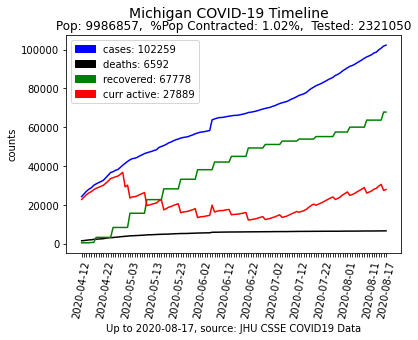

In [73]:
plot_jhu_data(df, 'Michigan')

## Plot all states

In [ ]:
for state in df['Province_State'].unique():
    plot_jhu_da